In [1]:
#Import the packages
import numpy as np 
import matplotlib.pyplot as plt 
import netCDF4 as nc

In [2]:
filename = 'AERDB_D3_VIIRS_SNPP.A2021060.001.2021064000406.nc'
ds = nc.Dataset(filename)

In [4]:
list(ds.variables)

['Aerosol_Optical_Thickness_550_Land_Count',
 'Aerosol_Optical_Thickness_550_Land_Maximum',
 'Aerosol_Optical_Thickness_550_Land_Mean',
 'Aerosol_Optical_Thickness_550_Land_Minimum',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Count',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Maximum',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Mean',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Minimum',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Standard_Deviation',
 'Aerosol_Optical_Thickness_550_Land_Standard_Deviation',
 'Aerosol_Optical_Thickness_550_Ocean_Count',
 'Aerosol_Optical_Thickness_550_Ocean_Maximum',
 'Aerosol_Optical_Thickness_550_Ocean_Mean',
 'Aerosol_Optical_Thickness_550_Ocean_Minimum',
 'Aerosol_Optical_Thickness_550_Ocean_Standard_Deviation',
 'Aerosol_Type_Land_Ocean_Histogram',
 'Aerosol_Type_Land_Ocean_Mode',
 'Aerosol_Types',
 'Angstrom_Exponent_Land_Maximum',
 'Angstrom_Exponent_Land_Mean',
 'Angstrom_Exponent_Land_Minimum',
 'Angstrom_Exponent_Land_Ocean_Maximum',
 'Angstrom

In [5]:
aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'])
aerosol[aerosol<0] = np.nan #exclude invalid values

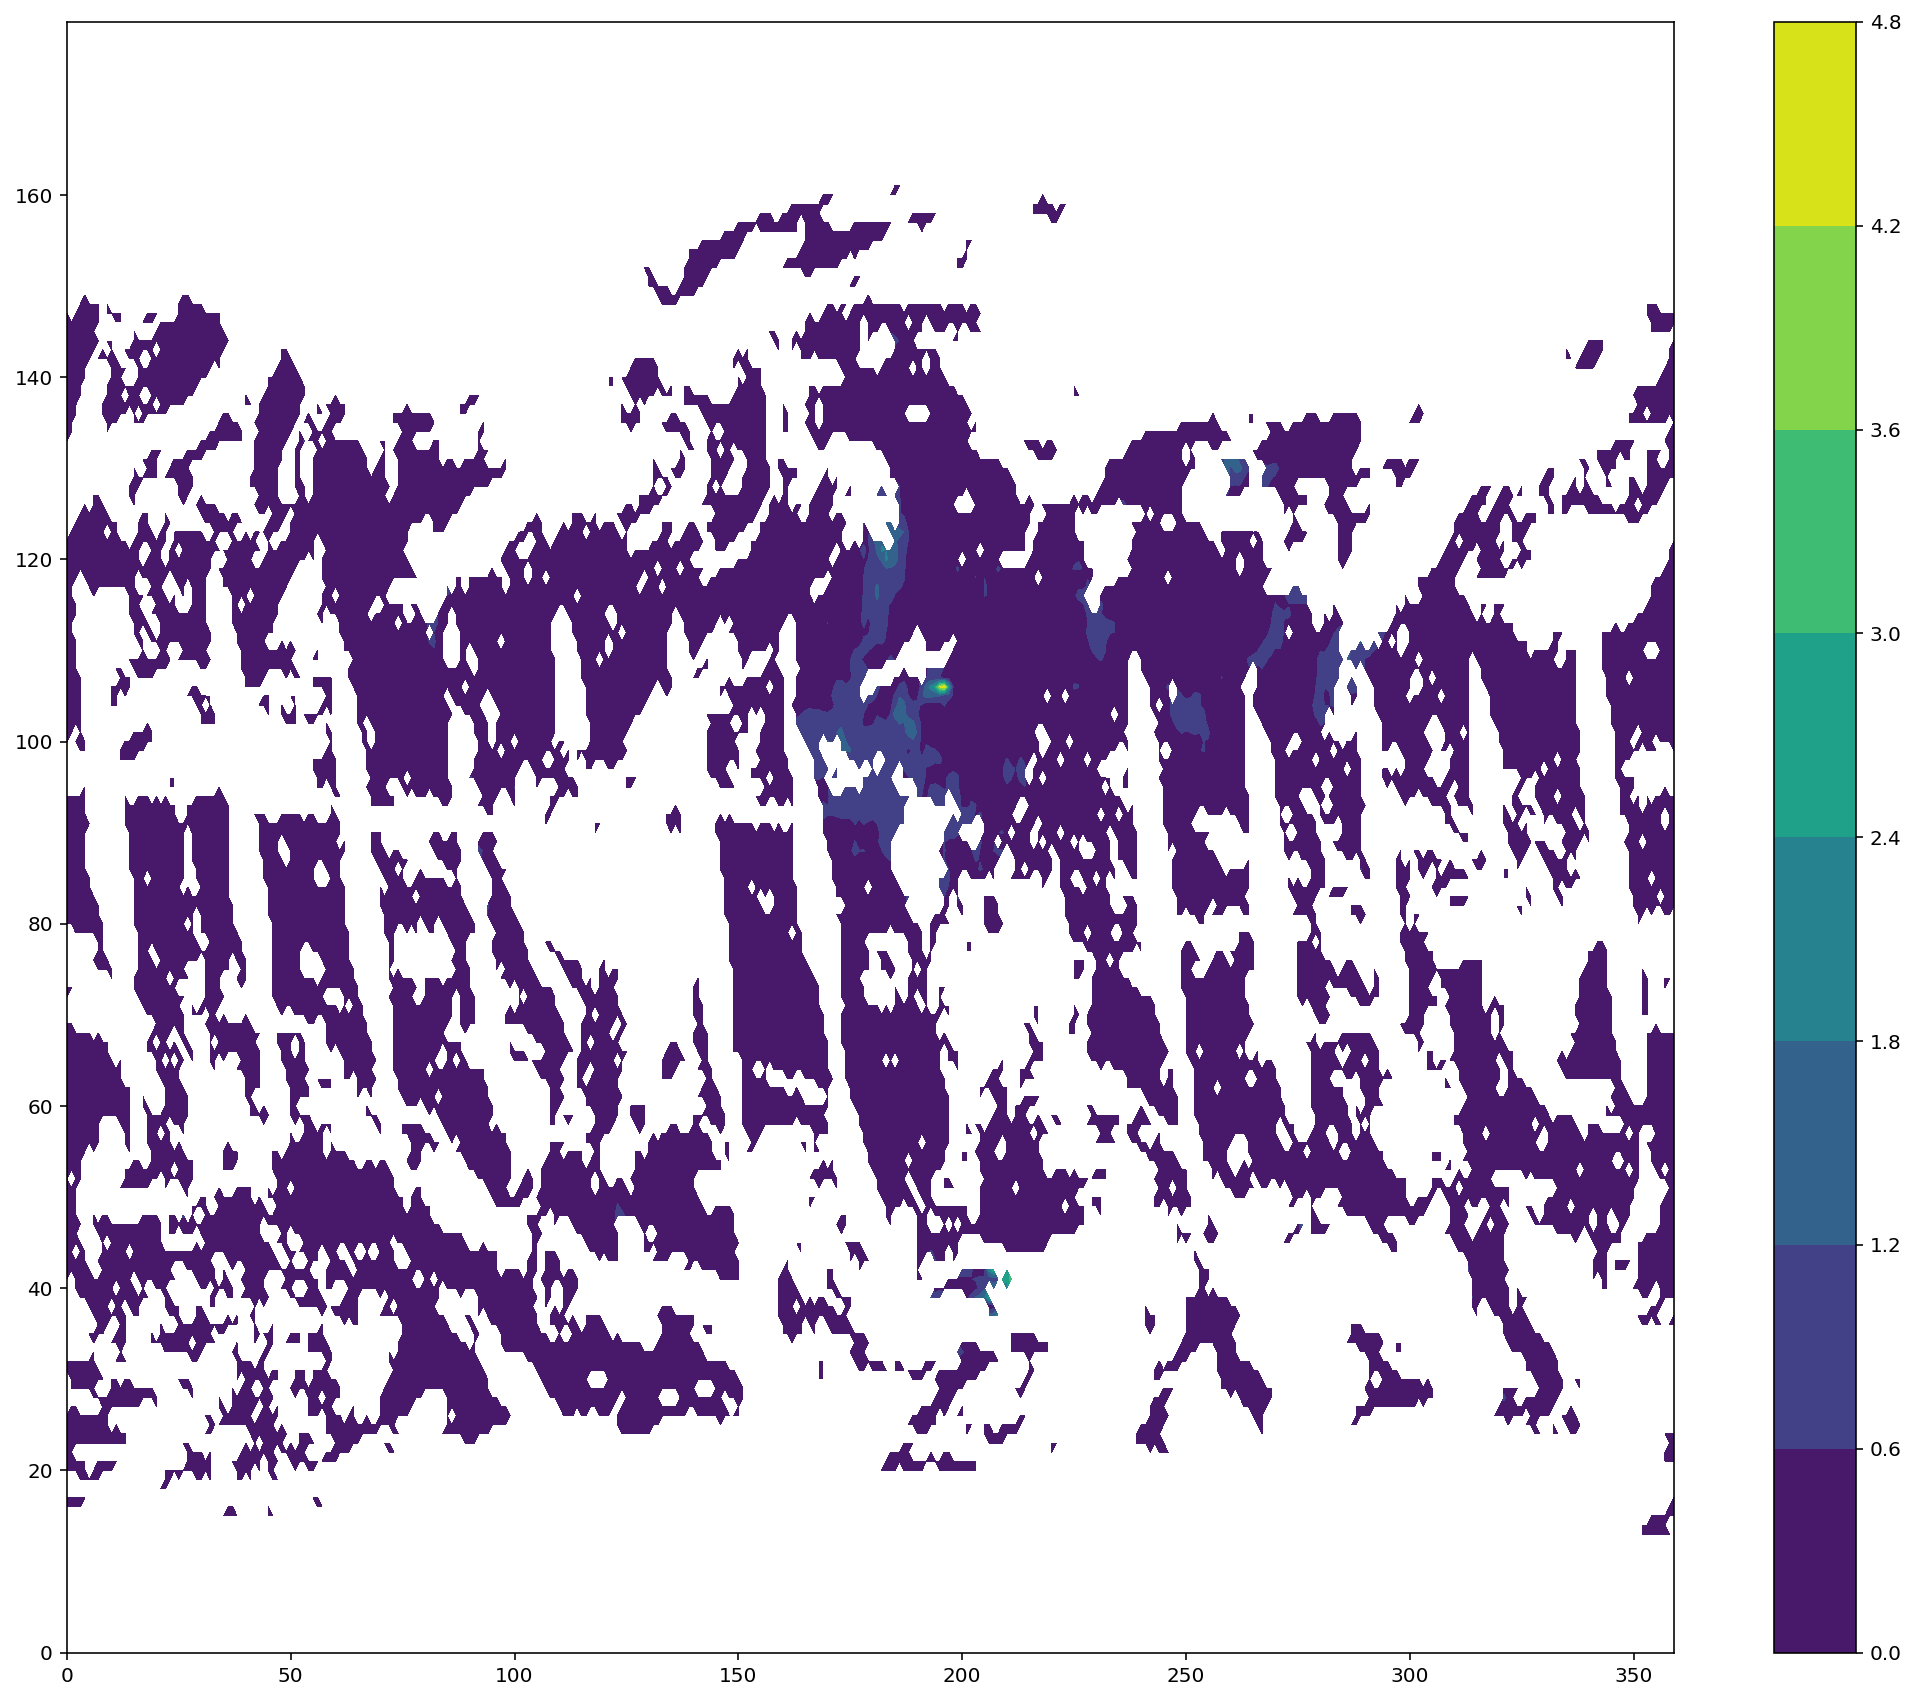

In [6]:
#This step is just for workshop demonstration, not essential for LBA requirement
#Visualize global 'Aerosol_Optical_Thickness_550_Land_Ocean_Mean'
plt.figure(figsize=(18,15))
plt.contourf(aerosol)
plt.colorbar()
plt.show()

In [7]:
SF_latitude = 37.5 #59.5
SF_longitude = -122.5 #18.5
latitude_filter = np.array(ds.variables['Latitude']) == SF_latitude
longitude_filter = np.array(ds.variables['Longitude']) == SF_longitude
latitude_and_longitude_filter = latitude_filter & longitude_filter
SF_aerosol = aerosol[latitude_and_longitude_filter]
print(SF_aerosol)

[0.09468189]


In [8]:
ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean']

<class 'netCDF4._netCDF4.Variable'>
float32 Aerosol_Optical_Thickness_550_Land_Ocean_Mean(Latitude_1D, Longitude_1D)
    units: 1
    coordinates: Longitude Latitude
    long_name: aerosol optical thickness estimated at 550 nm over land and ocean
    _FillValue: -999.0
    valid_range: [ 0. 10.]
unlimited dimensions: 
current shape = (180, 360)
filling on

In [9]:
from datetime import datetime
#This list of files should/must be modified/changed based on the datasets you decided to download. 
list_files = ["AERDB_D3_VIIRS_SNPP.A2021085.001.2021089000330.nc",
             "AERDB_D3_VIIRS_SNPP.A2021001.001.2021005000246.nc",
             "AERDB_D3_VIIRS_SNPP.A2021002.001.2021006001037.nc",
             "AERDB_D3_VIIRS_SNPP.A2021070.001.2021074001533.nc"
             
             
             
             
             
             
             
             
             ]

record_datetime = []
record_aerosol_SF = []

for filename in list_files:
    ds = nc.Dataset(filename)
    aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'])
    aerosol[aerosol<0] = np.nan #exclude invalid values

    SF_latitude = 37.5
    SF_longitude = -122.5
    latitude_filter = np.array(ds.variables['Latitude']) == SF_latitude
    longitude_filter = np.array(ds.variables['Longitude']) == SF_longitude
    latitude_and_longitude_filter = latitude_filter & longitude_filter
    SF_aerosol = aerosol[latitude_and_longitude_filter][0]

    #Access the datetime record (in DAAS format, or text format): 
    raw_datetime = ds.production_datetime

    #Process the datetime record to a form that can be plotted:
    processed_datetime = datetime.strptime(raw_datetime[:10], "%Y-%m-%d")
    
    record_aerosol_SF.append(SF_aerosol)
    record_datetime.append(processed_datetime)

<ipython-input-9-8057cf86ac30>:33: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  raw_datetime = ds.production_datetime


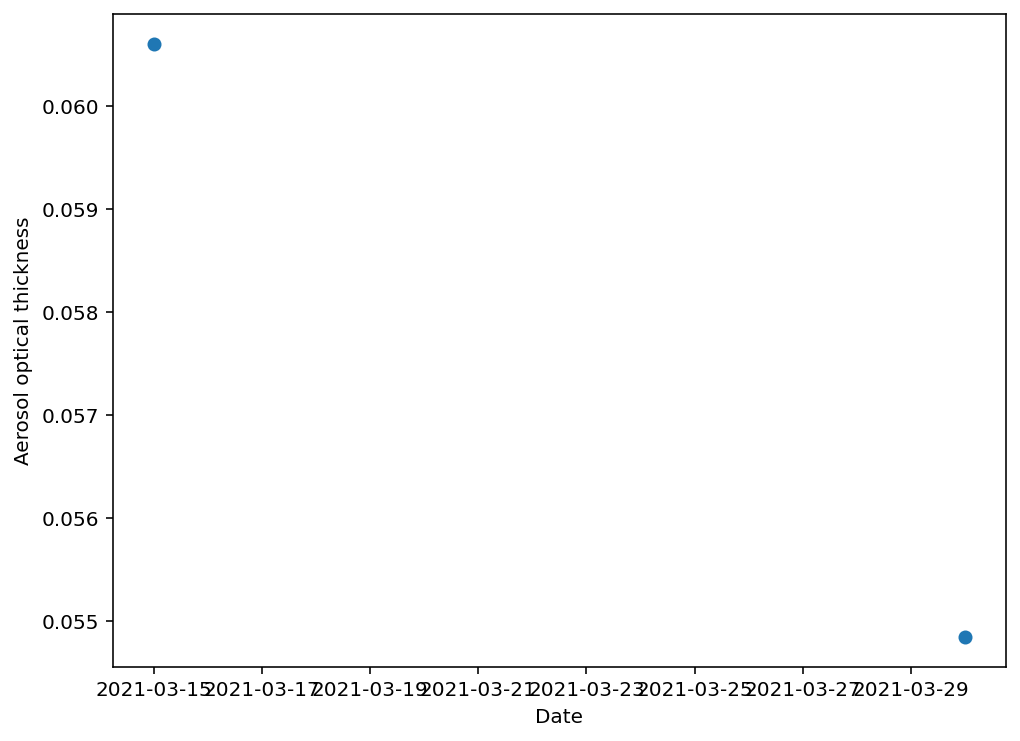

In [10]:
#One way to 
plt.figure(figsize=(8,6))
plt.scatter(record_datetime, record_aerosol_SF)
plt.xlabel("Date")
plt.ylabel("Aerosol optical thickness")
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Aerosol optical thickness'>

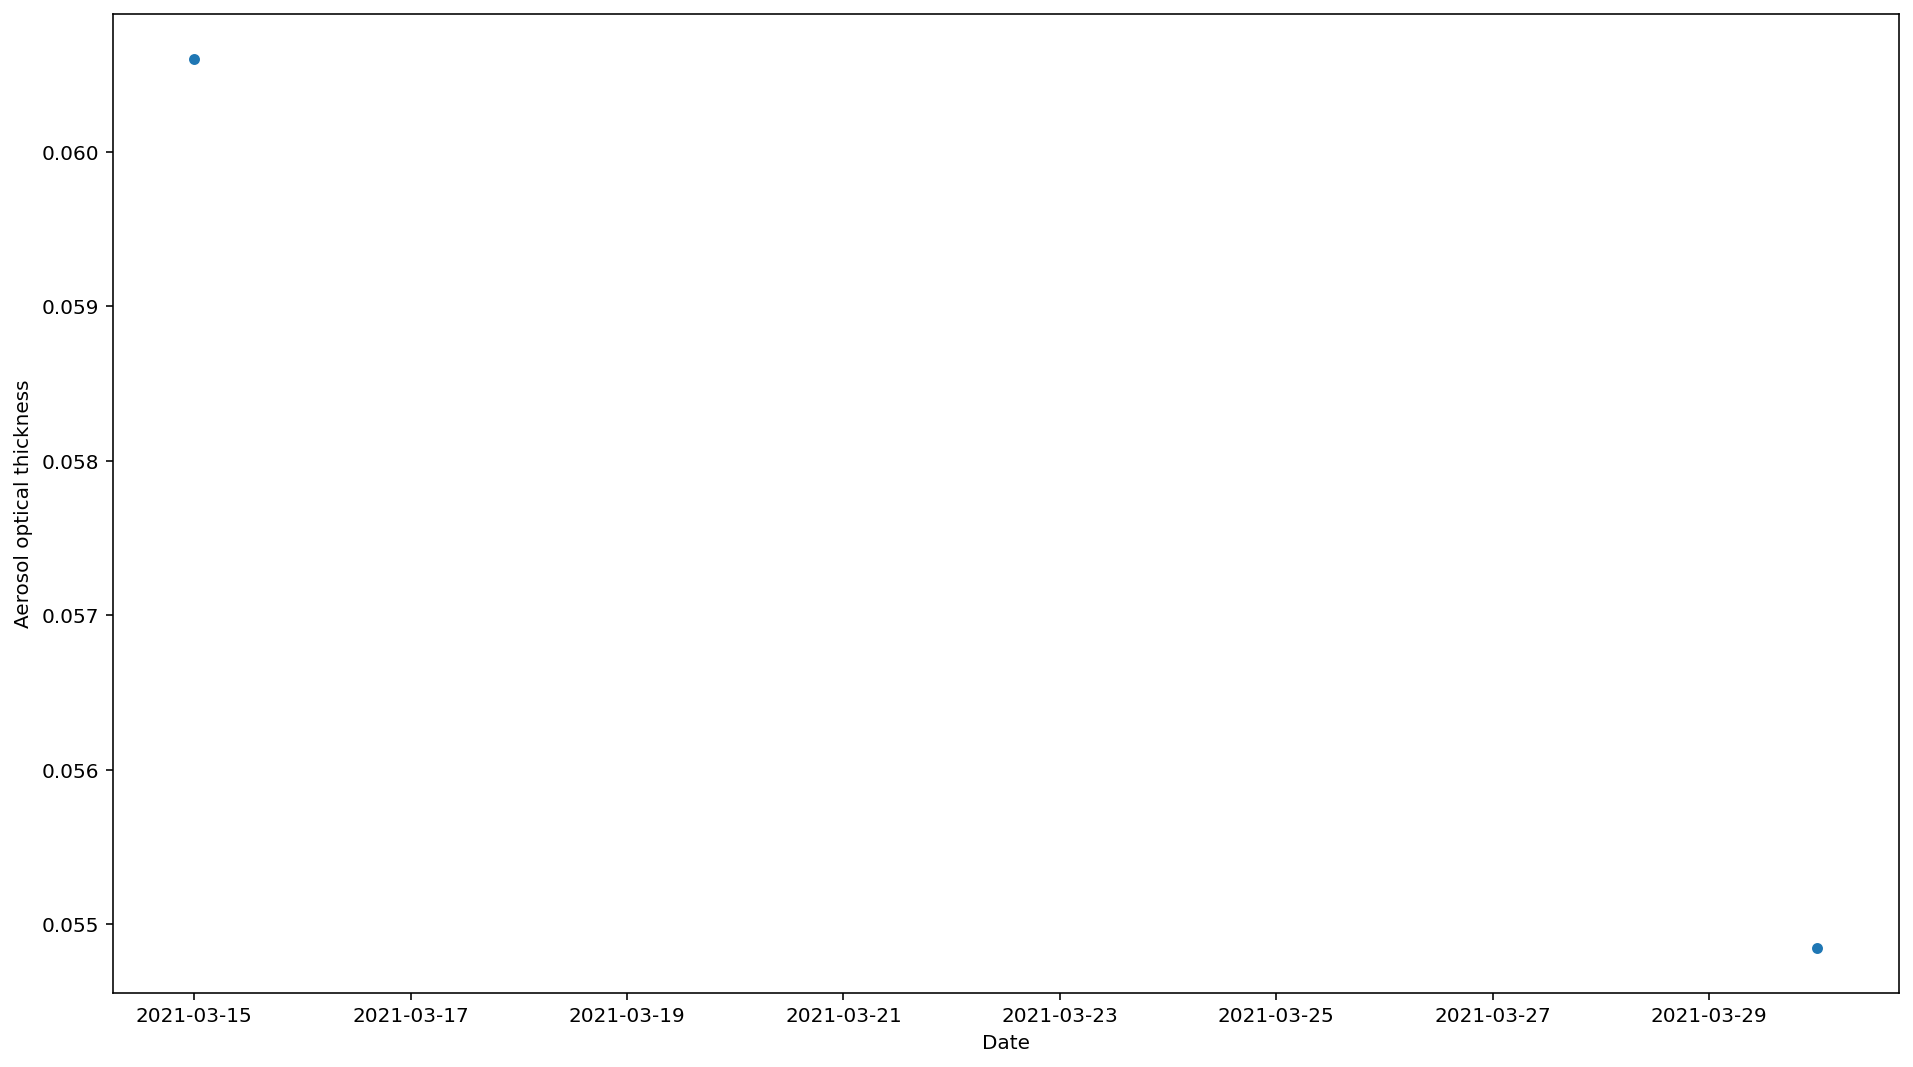

In [16]:
#An alternative package to visualize the data. This way, the x-axis will be visualize better. 
import pandas as pd
result_table = pd.DataFrame({"Date": record_datetime,
                            "Aerosol optical thickness": record_aerosol_SF})
result_table.plot(x='Date', y ='Aerosol optical thickness', figsize=(16,9),
                  kind='scatter')